In [ ]:
# Importing Libraries
import pandas as pd

# Importing the Dataset
dataset = pd.read_csv("iris.csv")
print(dataset.head())

# Preprocessing
X = dataset.iloc[:, 1:5]
y = dataset.iloc[:, 5]

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# Training
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

import pickle
# Model persistence
output_model_file = 'Knnmodel.pkl'

# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(classifier, f)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

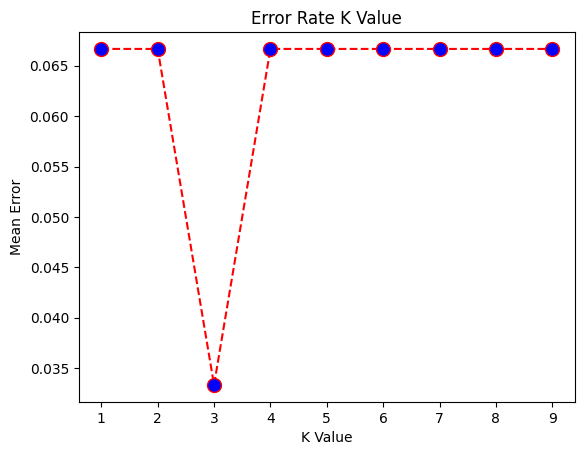

In [ ]:
import numpy as np

# Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
#     print(pred_i != y_test)
#     print(np.mean(pred_i != y_test))
    error.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt
plt.plot(range(1, 10), error,
         color='red', linestyle='dashed',
         marker='o', markerfacecolor='blue',
         markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
